## 확장, 침식 실험

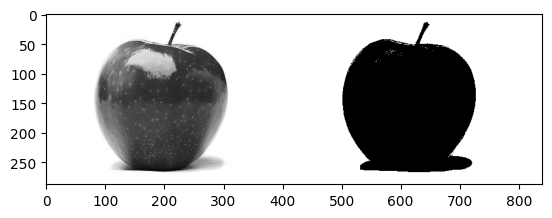

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
image_path = './data/apple.png'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

_, mask = cv2.threshold(image, 230, 255, cv2.THRESH_BINARY)

image_list = np.hstack([
    image,
    mask
])

plt.imshow(image_list, 'gray')
plt.show()

확장된 이미지를 만들고 이를 위해 함수를 사용한다. cv2.dilate() 함수에 대한 입력은 마스크 이미지와 커널이다.

In [15]:
np.ones((3,3), np.uint8)

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]], dtype=uint8)

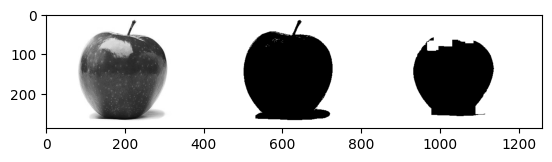

In [2]:
image_path = './data/apple.png'

image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

kernel = np.ones((3,3), np.uint8)

dilation = cv2.dilate(mask, kernel, iterations=10)

image_list = np.hstack([
    image,
    mask,
    dilation
])

plt.imshow(image_list, 'gray')
plt.show()

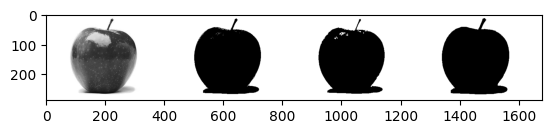

In [3]:
# 침식 -> cv2.erode() 사용
image_path = './data/apple.png'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

kernel = np.ones((3,3), np.uint8)
dilation = cv2.dilate(mask, kernel)
erosion = cv2.erode(mask, kernel)

image_list = np.hstack([
    image,
    mask,
    dilation,
    erosion
])

plt.imshow(image_list, 'gray')
plt.show()

## 개폐
cv2.marphologyEx()라는 함수를 사용해야 한다. 이 함수는 여러 작업에 사용할 수 있으므로 사용하려는 작업을 지정하는 매개 변수를 추가해야 한다. 즉 팽창 후 침식을 적용한다.

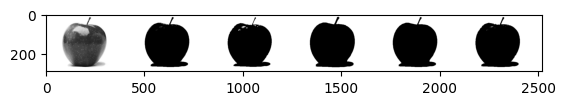

In [4]:
kernel = np.ones((3,3), np.uint8)
dilation = cv2.dilate(mask, kernel)
erosion = cv2.erode(mask, kernel)
opening = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
closing = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

image_list = np.hstack([
    image,
    mask,
    dilation,
    erosion,
    opening,
    closing
])

plt.imshow(image_list, 'gray')
plt.show()

## 형태학적 변환 팽창과 침식
형태학적 그래디언트 : 이미지의 팽창과 침식의 차이<br>
탑햇(Top hat) : 이미지와 이미지의 개방감 차이

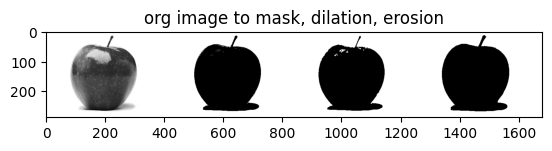

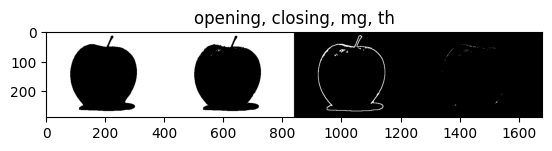

In [5]:
image_path : './data/apple.png'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

kernel = np.ones((3,3), np.uint8)
dilation = cv2.dilate(mask, kernel)
erosion = cv2.erode(mask, kernel)
opening = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
closing = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
mg = cv2.morphologyEx(mask, cv2.MORPH_GRADIENT, kernel)
th = cv2.morphologyEx(mask, cv2.MORPH_TOPHAT, kernel)

image_list_01 = np.hstack([
    image,
    mask,
    dilation,
    erosion
])

image_list_02 = np.hstack([
    opening,
    closing,
    mg,
    th
])

plt.imshow(image_list_01, 'gray')
plt.title('org image to mask, dilation, erosion')
plt.show()

plt.imshow(image_list_02, 'gray')
plt.title('opening, closing, mg, th')
plt.show()